# Fine_Dust
### 환경기상 데이터 전처리

In [4]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

glob.glob 코드 : 해당경로 안에 .csv 로 끝나는 파일명을 전부 리스트 형태로 저장
* path 부분에 본인 컴퓨터 경로로 복붙하세요

In [5]:
path = 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구'
filelist = glob.glob(path + '/*.csv')

In [6]:
filelist

['C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V01o1610468.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610252.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610540.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610542.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610543.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610544.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610545.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610546.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1610567.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1611145.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1611151.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1611170.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1611172.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1611173.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\\V10O1611220.csv',
 'C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터

### 파일 전처리 시작

In [7]:
Day_count = pd.DataFrame(columns =["파일명","날짜수"])

# stationlist : 'V1001~~~' 측정기 명칭 담고있는 List
# Data : { 'V1001~~' : 데이터프레임(일단위평균) } 담고있는 Dictinary

stationlist = list(range(len(filelist)))
Data = {}

* Dictionary 변수 : 구글링 한번 해보세요~~
* https://wikidocs.net/16 여기 참고해도 좋고  Key - Station이름 / Value - 데이터프레임 통째로 들어가있는 구조

데이터 전처리

In [8]:

# for문 : 각 Station 마다 전처리 반복

for i in range(len(filelist)):
    
    print(filelist[i])   # 중간 Check용 print
    
    name = filelist[i][43:54]
    stationlist[i] = name
    
    data = pd.read_csv(filelist[i])
    
    # 불필요한 변수 제거
    del data["Unnamed: 10"]
    del data["co2"]
    del data["vocs"]
    
    # tm -> 날짜 (Date), 시간 (Time) 으로 분리
    data['tm']=data['tm'].astype('str')
    data['Date']=data['tm'].apply(lambda e: e[:8])
    data['Time']=data['tm'].apply(lambda e: e[8:])
    
    del data['tm']
    del data['serial']
    del data['Time']
    
    
    # flag 값이 1이고, pm 수치가 양수인 데이터들만 저장
    data_1 = data[data.flag == 1]
    data_2 = data_1[data_1['pm25']>0]
    data_2 = data_2[data_2['pm10']>0]

    # Date를 기준으로 Group 지어서 평균값으로 저장
    data_mean = data_2.groupby('Date').mean()
    Data[name] = data_mean
    
    # 각 파일별 이름 / 날짜수 저장
    Day_count.loc[i] = [name,data_mean.shape[0]]
    

C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V01o1610468.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610252.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610540.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610542.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610543.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610544.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610545.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610546.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1610567.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611145.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611151.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611170.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611172.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611173.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611220.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611251.csv
C:/Users/Dongbin/Desktop/빅콘테스트/환경기상데이터/종로구\V10O1611255.c

In [10]:
Day_count

# ex) V01o1610452 의 경우 365일 중 348일만 데이터 존재

,파일명,날짜수
0,V01o1610468,0
1,V10O1610252,348
2,V10O1610540,266
3,V10O1610542,265
4,V10O1610543,280
5,V10O1610544,341
6,V10O1610545,354
7,V10O1610546,295
8,V10O1610567,320
9,V10O1611145,364


In [11]:
# 각 데이터에 대해 'Date' index -> 변수로
for i in stationlist[1:]:   
    Data[i] = Data[i].reset_index()

In [12]:
Data[stationlist[10]].head()

,Date,flag,pm10,noise,temp,humi,pm25
0,20180401,1.0,51.316667,43.561111,3.530764,42.785417,26.351389
1,20180402,1.0,54.454167,43.849306,6.618750,41.140972,22.604861
2,20180403,1.0,54.732639,44.086111,6.313194,45.004167,16.224306
3,20180404,1.0,19.437982,44.598458,1.155851,44.220042,11.449194
4,20180405,1.0,15.961111,44.934722,-4.268750,62.225694,11.613194


그대로 Plotting

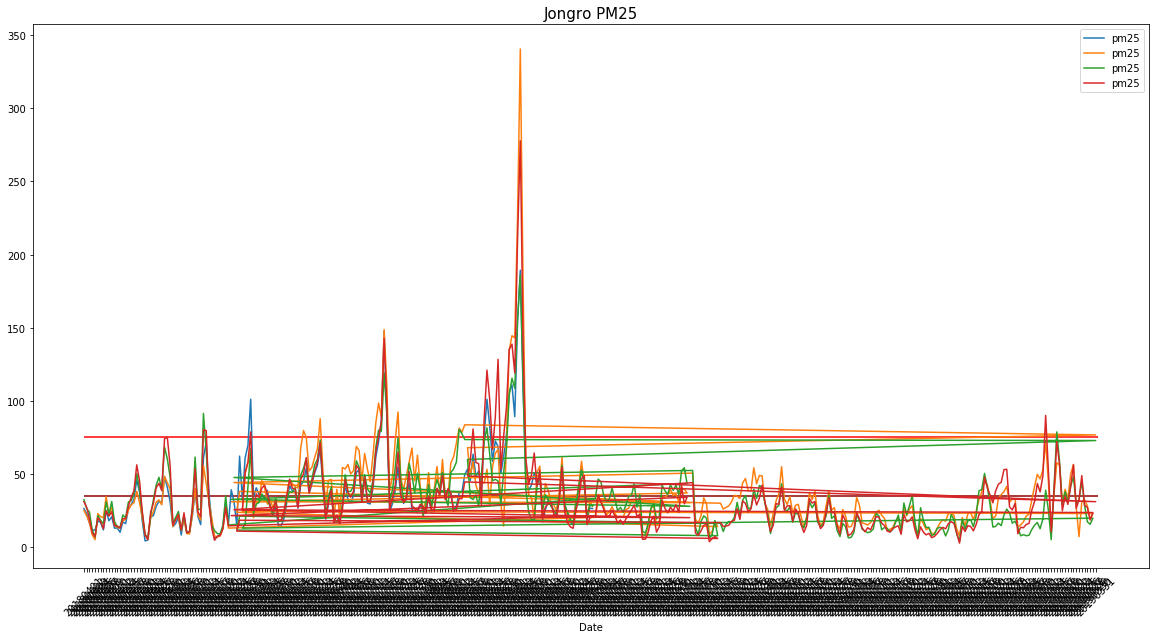

In [13]:
# 10:14 까지 4개만 가지고 Plotting
# 지그재그 형태 -> 아마 365일보다 적은 데이터부터 시작하면 날짜가 순서대로 안찍히는 듯

%matplotlib inline

fig = plt.figure(figsize = (20,10))
plt.title("Jongro PM25", fontsize = 15)
plt.xlabel("Date")
plt.xticks(range(len(Data['V10O1612113']['pm25'])),Data['V10O1612113']['Date'],rotation = 45)

for i in stationlist[10:14]:

    plt.plot(Data[i]['Date'],Data[i]['pm25'])

    
plt.hlines([35],0,len(data_mean),color='darkred')
plt.hlines([75],0,len(data_mean),color='red') 
#plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [14]:
# Date 변수 Type 변환
for i in stationlist[1:]:
    Data[i]['Date'] = Data[i]['Date'].astype(str)

In [15]:
stationlist[0]

'V01o1610468'

In [16]:
# 마지막 데이터가 365일 전부 포함
# 365일 전부 포함하는 데이터부터 Plotting 하기 위해 Reverse

stationlist.reverse()

In [18]:
stationlist[0]

'V10O1612113'

종로구 Station 31개 Plotting

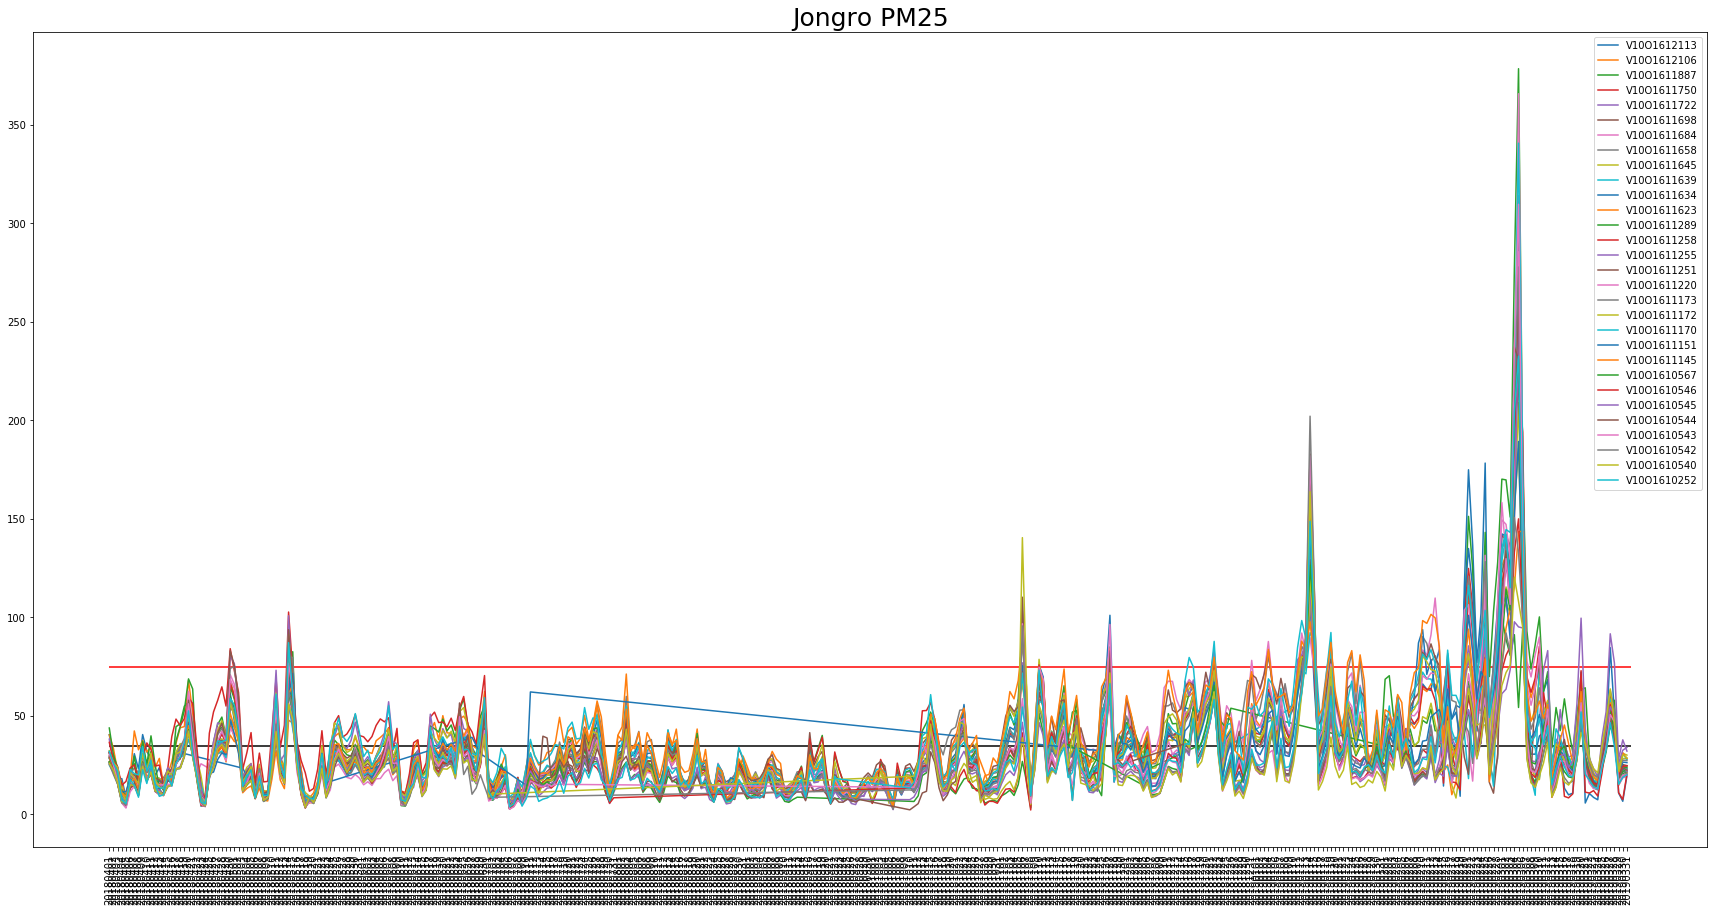

In [23]:
%matplotlib inline

fig = plt.figure(figsize = (30,15))
plt.title("Jongro PM25", fontsize = 25) 
plt.xticks(range(len(Data['V10O1612113']['pm25'])),Data['V10O1612113']['Date'],rotation = 90)

for i in stationlist[:30]:

    plt.plot(Data[i]['Date'], Data[i]['pm25'], label = i)
    
plt.hlines([35],0,len(data_mean),color='black')
plt.hlines([75],0,len(data_mean),color='red') 
#plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### 월별 Plot

In [24]:
# 데아터마다 Date 변수로 부터 Year_month 추출해서 변수 새로 생성

for i in stationlist[:30]:    
    Data[i]['Year_month'] =  Data[i]['Date'].apply(lambda e : e[0:6])

In [25]:
# Year_month 확인

Year_month_list = np.unique(Data[stationlist[0]]['Year_month'].values)
Year_month_list

array(['201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', '201902', '201903'],
      dtype=object)

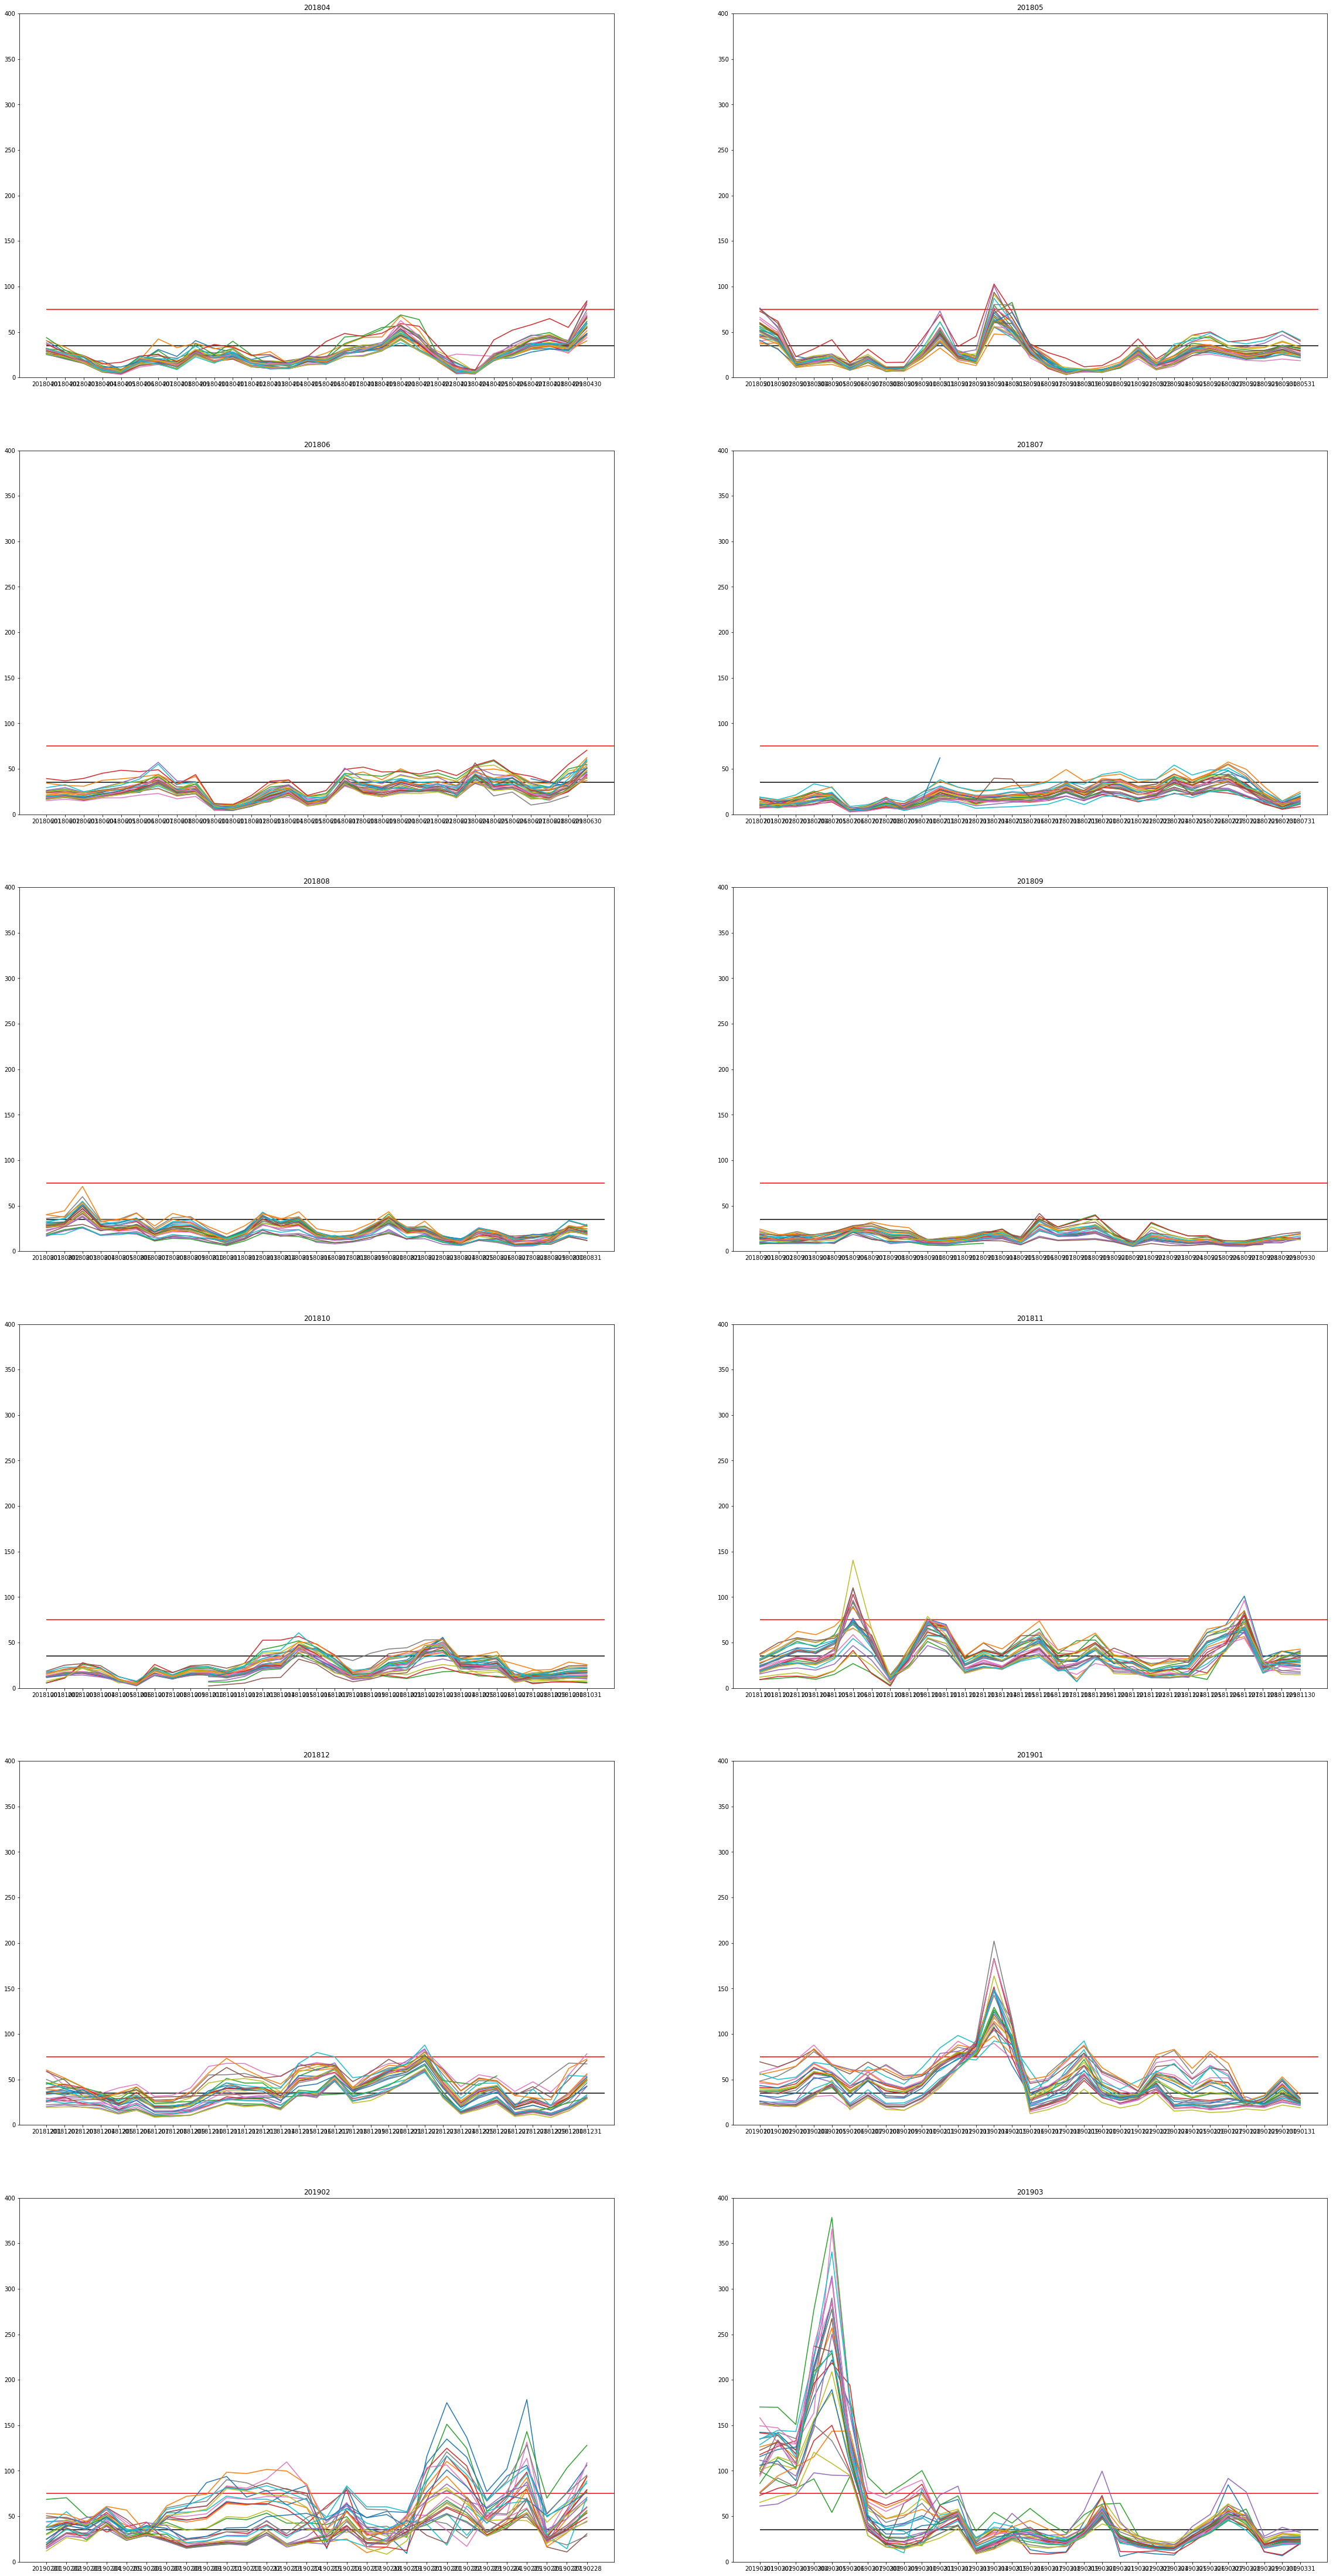

In [26]:
fig = plt.figure(figsize = (40,80))

num = 1

# 모든 year_month 마다 plot생성

for M in Year_month_list:

    ax = fig.add_subplot(6,2,num)
    ax.title.set_text(M)
    
    ax.set_ylim([0,400])
    ax.hlines([35],0,31,color='black')
    ax.hlines([75],0,31,color='red')
    
    for i in stationlist[:30]:
        plotting_data = Data[i].loc[(Data[i]['Year_month'] == M)]
        ax.plot(plotting_data['Date'], plotting_data['pm25'], label = i)
    
    num = num + 1